In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import numpy as np


In [2]:
bikes = pd.read_csv('bikes.csv')
bikes.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


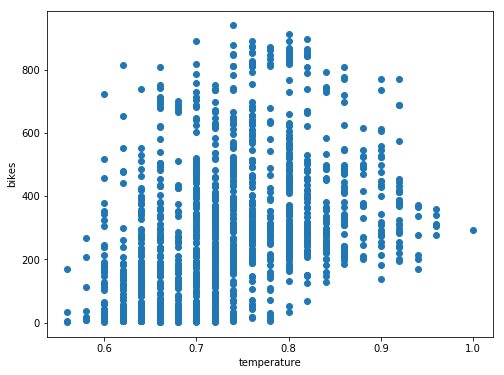

In [7]:
plt.figure(figsize=(8,6))
plt.plot(bikes['temp'], bikes['cnt'], 'o')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.show()

In [11]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(np.array([bikes['temp']]).T, bikes['cnt'])


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
x = np.array([5.])

regressor.predict(x.reshape(-1,1))

array([395.2920354])

In [13]:
x = np.array([20.])
regressor.predict(x.reshape(-1,1))

array([395.2920354])

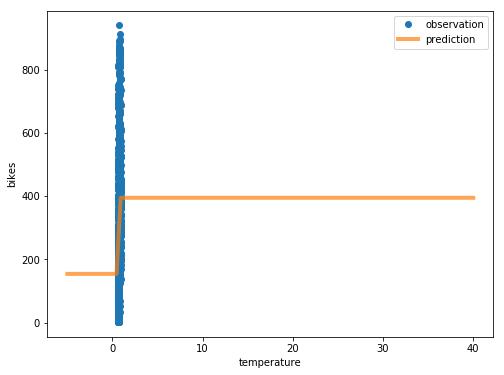

In [14]:
xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temp'], bikes['cnt'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.legend()
plt.show()

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file='tree.dot', feature_names=['temp'])

In [17]:
!dot -Tpng tree.dot > tree.png # to convert the tree in a png image

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
from IPython.display import Image
Image(filename='tree.png')